# Customer Churn Prediction

### Load and Explore the Data

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("Telco Customer Churn.csv")

# Display basic info
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Cleaning

In [8]:
# Check for missing values
print(df.isnull().sum())

# Some 'TotalCharges' might be blank strings, convert to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Drop customerID (not useful for prediction)
df.drop('customerID', axis=1, inplace=True)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


C:\Users\dell\AppData\Local\Temp\ipykernel_2600\1439401671.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


### Exploratory Data Analysis

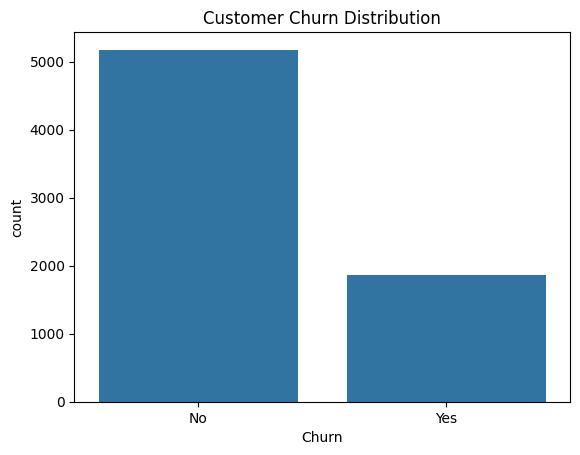

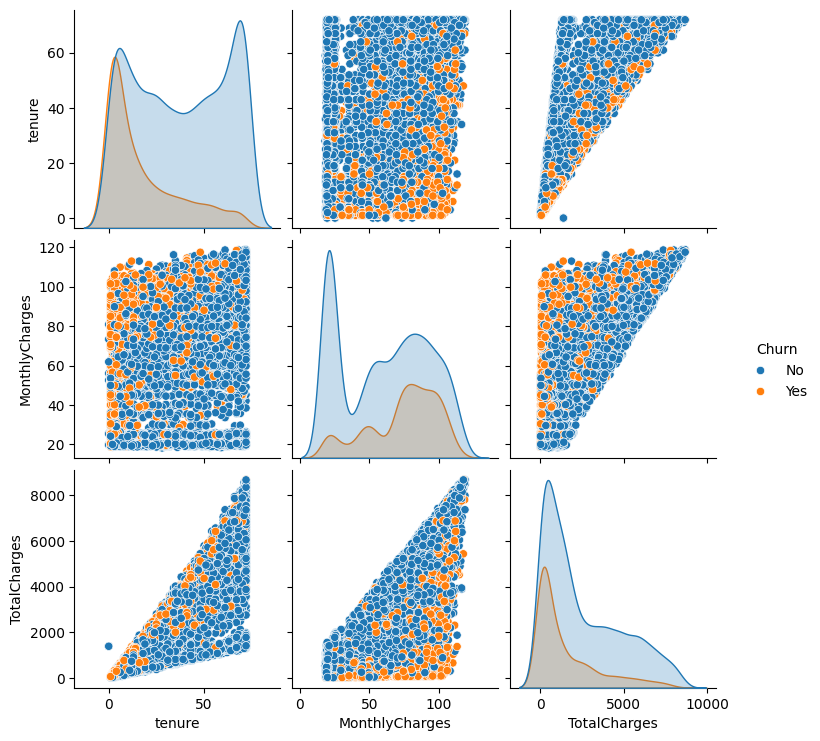

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot churn distribution
sns.countplot(x='Churn', data=df)
plt.title("Customer Churn Distribution")
plt.show()

# Check correlation with numerical variables
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
sns.pairplot(df, vars=num_cols, hue='Churn')
plt.show()

### Feature Encoding

In [10]:
# Convert categorical variables to numeric
df_encoded = pd.get_dummies(df, drop_first=True)

# Split features and target
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.head())
print(y_train.head())


      SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
2142              0      21           64.85      1336.800        False   
1623              0      54           97.20      5129.450        False   
6074              0       1           23.45        23.450         True   
1362              0       4           70.20       237.950         True   
6754              0       0           61.90      1397.475         True   

      Partner_Yes  Dependents_Yes  PhoneService_Yes  \
2142        False            True              True   
1623        False           False              True   
6074         True           False             False   
1362        False           False              True   
6754        False            True              True   

      MultipleLines_No phone service  MultipleLines_Yes  ...  \
2142                           False              False  ...   
1623                           False               True  ...   
6074                            

### Model Training

Accuracy: 0.7892122072391767

Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.91      0.86      1036
        True       0.64      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



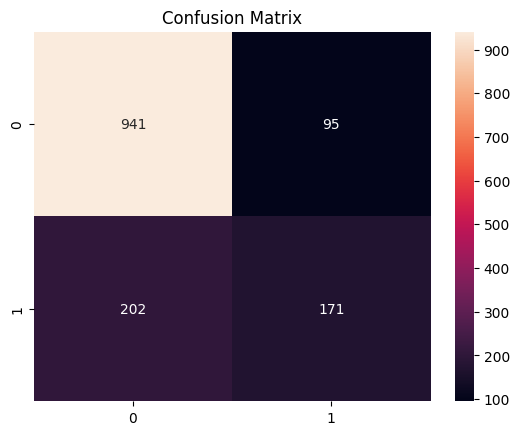

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

### Save Model

In [13]:
import joblib

# Save the trained model
joblib.dump(model, 'churn_model.pkl')

# Also save your encoder/columns (so app knows the feature order)
joblib.dump(list(X.columns), 'model_columns.pkl')

['model_columns.pkl']

### Streamlit App
### streamlit run app.py